### First, let's inspect the datasets to understand their structure, the features available, and how they align with each other. This will help in determining if we can merge them into a single dataset or if we should process them separately.

# Step 1: Data Inspection and Merging 

In [1]:
import pandas as pd

# Load the datasets
airplane_cleaned = pd.read_csv('/Users/rajbehera/Documents/college docs/machine learning/Project 2/Airplane_Cleaned.csv')
airplane_complete_imputation = pd.read_csv('/Users/rajbehera/Documents/college docs/machine learning/Project 2/Airplane_Complete_Imputation.csv')
airplane_stochastic_imputation = pd.read_csv('/Users/rajbehera/Documents/college docs/machine learning/Project 2/Airplane_Stochastic_Imputation.csv')
helicopter_bluebook = pd.read_csv('/Users/rajbehera/Documents/college docs/machine learning/Project 2/Helicopter_BlueBook.csv')

# Display the first few rows of each dataset to understand their structure
datasets = {
    'Airplane_Cleaned': airplane_cleaned,
    'Airplane_Complete_Imputation': airplane_complete_imputation,
    'Airplane_Stochastic_Imputation': airplane_stochastic_imputation,
    'Helicopter_BlueBook': helicopter_bluebook
}

# Display the first few rows and the summary (info) of each dataset
for name, dataset in datasets.items():
    print(f"Dataset: {name}")
    display(dataset.head(100))
    dataset.info()
    print("\n")


Dataset: Airplane_Cleaned


,Model,Company,Engine Type,Multi Engine,TP mods,THR,SHP,Length,Height,Wing Span,...,Vstall,Hmax,Hmax (One),ROC,ROC (One),Vlo,Slo,Vl,Sl,Range
0,15 AC Sedan,Aeronca,Piston,NaN,False,NaN,145.0,25.250000,10.250000,37.416667,...,46.0,13000.0,NaN,450.0,NaN,900.0,NaN,1300.0,NaN,370.0
1,11 CC Super Chief,Aeronca,Piston,NaN,False,NaN,85.0,20.583333,8.750000,36.083333,...,44.0,12300.0,NaN,600.0,NaN,720.0,NaN,800.0,NaN,190.0
2,7 CCM Champ,Aeronca,Piston,NaN,False,NaN,90.0,21.416667,8.583333,35.000000,...,37.0,16000.0,NaN,650.0,NaN,475.0,NaN,850.0,NaN,210.0
3,7 DC Champ,Aeronca,Piston,NaN,False,NaN,85.0,21.416667,8.583333,35.000000,...,37.0,13000.0,NaN,620.0,NaN,500.0,NaN,850.0,NaN,210.0
4,7 AC Champ,Aeronca,Piston,NaN,False,NaN,65.0,21.416667,8.750000,35.000000,...,33.0,12500.0,NaN,370.0,NaN,632.0,NaN,885.0,NaN,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,65 Queen Air,Beechcraft (Hawker Beechcraft),Piston,True,False,NaN,340.0,33.250000,14.083333,45.833333,...,70.0,27000.0,12100.0,1300.0,210.0,1700.0,1310.0,1980.0,1425.0,630.0
96,B 60 Duke pressurized (prior '78 t/o run=2006),Beechcraft (Hawker Beechcraft),Piston,True,False,NaN,380.0,33.833333,12.333333,39.250000,...,73.0,30000.0,15100.0,1601.0,307.0,2626.0,2075.0,3065.0,1318.0,1010.0
97,A 60 Duke pressurized,Beechcraft (Hawker Beechcraft),Piston,True,False,NaN,380.0,33.833333,12.333333,39.250000,...,76.0,30800.0,15100.0,1601.0,307.0,2626.0,2006.0,3065.0,1318.0,824.0
98,60 Duke Pressurized,Beechcraft (Hawker Beechcraft),Piston,True,False,NaN,380.0,33.833333,12.333333,39.250000,...,76.0,31300.0,15700.0,1615.0,319.0,1660.0,1253.0,2340.0,1590.0,824.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         860 non-null    object 
 1   Company       860 non-null    object 
 2   Engine Type   860 non-null    object 
 3   Multi Engine  381 non-null    object 
 4   TP mods       860 non-null    bool   
 5   THR           156 non-null    float64
 6   SHP           704 non-null    float64
 7   Length        846 non-null    float64
 8   Height        843 non-null    float64
 9   Wing Span     856 non-null    float64
 10  FW            855 non-null    float64
 11  MEW           840 non-null    float64
 12  AUW           857 non-null    float64
 13  Vmax          817 non-null    float64
 14  Vcruise       838 non-null    float64
 15  Vstall        762 non-null    float64
 16  Hmax          827 non-null    float64
 17  Hmax (One)    361 non-null    float64
 18  ROC           798 non-null    

,Model,Company,Engine Type,Multi Engine,TP mods,THR,SHP,Length,Height,Wing Span,...,Vstall,Hmax,Hmax (One),ROC,ROC (One),Vlo,Slo,Vl,Sl,Range
0,15 AC Sedan,Aeronca,Piston,False,False,NaN,145.0,25.250000,10.250000,37.416667,...,46.0,13000.0,13000.0,450.0,450.0,900.0,391.970247,1300.0,257.745075,370.0
1,11 CC Super Chief,Aeronca,Piston,False,False,NaN,85.0,20.583333,8.750000,36.083333,...,44.0,12300.0,12300.0,600.0,600.0,720.0,26.247647,800.0,225.324824,190.0
2,7 CCM Champ,Aeronca,Piston,False,False,NaN,90.0,21.416667,8.583333,35.000000,...,37.0,16000.0,16000.0,650.0,650.0,475.0,363.139711,850.0,585.751317,210.0
3,7 DC Champ,Aeronca,Piston,False,False,NaN,85.0,21.416667,8.583333,35.000000,...,37.0,13000.0,13000.0,620.0,620.0,500.0,407.797297,850.0,642.046166,210.0
4,7 AC Champ,Aeronca,Piston,False,False,NaN,65.0,21.416667,8.750000,35.000000,...,33.0,12500.0,12500.0,370.0,370.0,632.0,297.056192,885.0,329.571813,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,65 Queen Air,Beechcraft (Hawker Beechcraft),Piston,True,False,NaN,340.0,33.250000,14.083333,45.833333,...,70.0,27000.0,12100.0,1300.0,210.0,1700.0,1310.000000,1980.0,1425.000000,630.0
96,B 60 Duke pressurized (prior '78 t/o run=2006),Beechcraft (Hawker Beechcraft),Piston,True,False,NaN,380.0,33.833333,12.333333,39.250000,...,73.0,30000.0,15100.0,1601.0,307.0,2626.0,2075.000000,3065.0,1318.000000,1010.0
97,A 60 Duke pressurized,Beechcraft (Hawker Beechcraft),Piston,True,False,NaN,380.0,33.833333,12.333333,39.250000,...,76.0,30800.0,15100.0,1601.0,307.0,2626.0,2006.000000,3065.0,1318.000000,824.0
98,60 Duke Pressurized,Beechcraft (Hawker Beechcraft),Piston,True,False,NaN,380.0,33.833333,12.333333,39.250000,...,76.0,31300.0,15700.0,1615.0,319.0,1660.0,1253.000000,2340.0,1590.000000,824.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         860 non-null    object 
 1   Company       860 non-null    object 
 2   Engine Type   860 non-null    object 
 3   Multi Engine  860 non-null    bool   
 4   TP mods       860 non-null    bool   
 5   THR           156 non-null    float64
 6   SHP           704 non-null    float64
 7   Length        860 non-null    float64
 8   Height        860 non-null    float64
 9   Wing Span     860 non-null    float64
 10  FW            860 non-null    float64
 11  MEW           860 non-null    float64
 12  AUW           860 non-null    float64
 13  Vmax          860 non-null    float64
 14  Vcruise       860 non-null    float64
 15  Vstall        860 non-null    float64
 16  Hmax          860 non-null    float64
 17  Hmax (One)    860 non-null    float64
 18  ROC           860 non-null    

,Model,Company,Engine Type,Multi Engine,TP mods,THR,SHP,Length,Height,Wing Span,...,Vstall,Hmax,Hmax (One),ROC,ROC (One),Vlo,Slo,Vl,Sl,Range
0,15 AC Sedan,Aeronca,Piston,NaN,False,NaN,145.0,25.250000,10.250000,37.416667,...,46.0,13000.0,NaN,450.0,NaN,900.0,391.970247,1300.0,257.745075,370.0
1,11 CC Super Chief,Aeronca,Piston,NaN,False,NaN,85.0,20.583333,8.750000,36.083333,...,44.0,12300.0,NaN,600.0,NaN,720.0,26.247647,800.0,225.324824,190.0
2,7 CCM Champ,Aeronca,Piston,NaN,False,NaN,90.0,21.416667,8.583333,35.000000,...,37.0,16000.0,NaN,650.0,NaN,475.0,363.139711,850.0,585.751317,210.0
3,7 DC Champ,Aeronca,Piston,NaN,False,NaN,85.0,21.416667,8.583333,35.000000,...,37.0,13000.0,NaN,620.0,NaN,500.0,407.797297,850.0,642.046166,210.0
4,7 AC Champ,Aeronca,Piston,NaN,False,NaN,65.0,21.416667,8.750000,35.000000,...,33.0,12500.0,NaN,370.0,NaN,632.0,297.056192,885.0,329.571813,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,65 Queen Air,Beechcraft (Hawker Beechcraft),Piston,True,False,NaN,340.0,33.250000,14.083333,45.833333,...,70.0,27000.0,12100.0,1300.0,210.0,1700.0,1310.000000,1980.0,1425.000000,630.0
96,B 60 Duke pressurized (prior '78 t/o run=2006),Beechcraft (Hawker Beechcraft),Piston,True,False,NaN,380.0,33.833333,12.333333,39.250000,...,73.0,30000.0,15100.0,1601.0,307.0,2626.0,2075.000000,3065.0,1318.000000,1010.0
97,A 60 Duke pressurized,Beechcraft (Hawker Beechcraft),Piston,True,False,NaN,380.0,33.833333,12.333333,39.250000,...,76.0,30800.0,15100.0,1601.0,307.0,2626.0,2006.000000,3065.0,1318.000000,824.0
98,60 Duke Pressurized,Beechcraft (Hawker Beechcraft),Piston,True,False,NaN,380.0,33.833333,12.333333,39.250000,...,76.0,31300.0,15700.0,1615.0,319.0,1660.0,1253.000000,2340.0,1590.000000,824.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         860 non-null    object 
 1   Company       860 non-null    object 
 2   Engine Type   860 non-null    object 
 3   Multi Engine  381 non-null    object 
 4   TP mods       860 non-null    bool   
 5   THR           156 non-null    float64
 6   SHP           704 non-null    float64
 7   Length        860 non-null    float64
 8   Height        860 non-null    float64
 9   Wing Span     860 non-null    float64
 10  FW            860 non-null    float64
 11  MEW           860 non-null    float64
 12  AUW           860 non-null    float64
 13  Vmax          860 non-null    float64
 14  Vcruise       860 non-null    float64
 15  Vstall        860 non-null    float64
 16  Hmax          860 non-null    float64
 17  Hmax (One)    361 non-null    float64
 18  ROC           860 non-null    

,Helicopter Description,Company,Max speed. Knots. S.L.,Cruise. Knots. S.L.,VNE. Knots @ gross,ROC fpm. @ gross S.L.,Range. std tanks. S.L.N.M.,Crusie time (hrs/min),Fuel Avg. gph @ cruise,Fuel std. usable gal.,...,Service ceiling all eng's max gross std day,HIGE max grpss std day,HOGE max gross std day,M/R blades dia. (ft/in),Number of Blades,Blade Material,Rotot Type,Storage Width (ft/in),Length (ft/in),Height (ft/in)
0,A109,Agusta Aerospace Corporation,150.0,129.0,167.0,2.0,251.0,2/15,56,145,...,15.0,10.0,7.0,36/1,4.0,metal,F/Artic,9/6,43/7,10/9
1,A109A,Agusta Aerospace Corporation,152.0,143.0,161.0,1.0,297.0,3/7,62,146,...,15.0,8.0,5.0,36/1,4.0,metal,F/Artic,9/6,43/7,10/9
2,A109A II,Agusta Aerospace Corporation,NaN,147.0,168.0,2.0,333.0,2/57,62,146,...,15.0,8.0,5.0,36/1,4.0,metal,F/Artic,9/5,42/10,10/10
3,A109-MKII Plus,Agusta Aerospace Corporation,NaN,152.0,168.0,2.0,440.0,4/35,NaN,145,...,15.0,12.0,9.0,36/1,4.0,metal,F/Artic,NaN,NaN,NaN
4,430,"Bell Helicopter, A Textron Company",150.0,139.0,150.0,2.0,383.0,NaN,80,247,...,18.0,11.0,9.0,42/0,4.0,comp,NaN,11/3,44/1,11/2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,300CB,Schweizer Aircraft,NaN,85.0,94.0,NaN,NaN,4.5,NaN,35,...,NaN,7.0,5.0,26/10,3.0,metal,F/Artic,6/6,30/10,8/9
96,300/269B,Schweizer Aircraft,76.0,70.0,76.0,1.0,191.0,3/20,10.5,30,...,13.0,8.0,6.0,25/4,3.0,metal,F/Artic,6/6,28/11,8/3
97,200/269A,Schweizer Aircraft,75.0,72.0,75.0,1.0,191.0,NaN,10,25,...,11.0,5.0,2.0,25/0,3.0,metal,F/Artic,6/6,28/5,8/0
98,"S-76 Mark II,A",Sikorsky Aircraft,144.0,128.0,155.0,1.0,351.0,3.3,NaN,277,...,15.0,5.0,2.0,44/0,4.0,comp,F/Artic,10/0,52/6,14/6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Helicopter Description                       102 non-null    object 
 1   Company                                      102 non-null    object 
 2   Max speed. Knots. S.L.                       79 non-null     float64
 3   Cruise. Knots. S.L.                          98 non-null     float64
 4   VNE. Knots @ gross                           95 non-null     float64
 5   ROC fpm. @ gross S.L.                        96 non-null     float64
 6   Range. std tanks. S.L.N.M.                   95 non-null     float64
 7   Crusie time (hrs/min)                        67 non-null     object 
 8   Fuel Avg. gph @ cruise                       78 non-null     object 
 9   Fuel std. usable gal.                        96 non-null     object 
 10  Fu

# Step 2: Preprocessing

We'll perform preprocessing tailored to the specifics of the datasets, which includes:

**Feature Selection:** Identify which features are relevant to predicting the optimal aircraft. This may include performance metrics (e.g., range, fuel efficiency), cost metrics (e.g., maintenance costs), and capacity metrics (e.g., seating capacity).

**Encoding and Scaling:** Apply one-hot encoding to categorical variables and scale numerical features to prepare them for machine learning models.

**Data Integration:** If applicable, merge the datasets into a unified dataset or prepare them for parallel analysis.

In [2]:

# Handling missing values - For simplicity, we'll impute missing numerical values with the median and drop columns with a high percentage of missing values
# Dropping columns with a high percentage of missing values (e.g., more than 50% missing data)
columns_to_drop = airplane_cleaned.columns[airplane_cleaned.isnull().mean() > 0.5]
airplane_cleaned_dropped = airplane_cleaned.drop(columns=columns_to_drop)

# Imputing missing numerical values with the median
numerical_columns = airplane_cleaned_dropped.select_dtypes(include=['float64', 'int64']).columns
airplane_cleaned_dropped[numerical_columns] = airplane_cleaned_dropped[numerical_columns].apply(lambda x: x.fillna(x.median()), axis=0)

# Verify the cleaning by displaying the info of the cleaned dataset
airplane_cleaned_dropped.info()

# Display the columns that were dropped
columns_to_drop


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model        860 non-null    object 
 1   Company      860 non-null    object 
 2   Engine Type  860 non-null    object 
 3   TP mods      860 non-null    bool   
 4   SHP          860 non-null    float64
 5   Length       860 non-null    float64
 6   Height       860 non-null    float64
 7   Wing Span    860 non-null    float64
 8   FW           860 non-null    float64
 9   MEW          860 non-null    float64
 10  AUW          860 non-null    float64
 11  Vmax         860 non-null    float64
 12  Vcruise      860 non-null    float64
 13  Vstall       860 non-null    float64
 14  Hmax         860 non-null    float64
 15  ROC          860 non-null    float64
 16  Vlo          860 non-null    float64
 17  Slo          860 non-null    float64
 18  Vl           860 non-null    float64
 19  Sl      

Index(['Multi Engine', 'THR', 'Hmax (One)', 'ROC (One)'], dtype='object')

# Next Steps:
**Feature Engineering and Selection**: We might consider creating additional features that could help in predicting the optimal aircraft, such as efficiency ratios or derived performance metrics.

**Encoding and Scaling**: Categorical variables will be encoded, and numerical features will be scaled to ensure that the model can effectively learn from the data.

**Model Development**: Based on the cleaned dataset, we'll select a suitable model to predict the optimal aircraft. Given the nature of the problem, this could 
involve regression to predict specific performance metrics or classification to categorize aircraft into different optimality classes.

In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identifying categorical and numerical columns for encoding and scaling
categorical_columns = airplane_cleaned_dropped.select_dtypes(include=['object', 'bool']).columns
numerical_columns = airplane_cleaned_dropped.select_dtypes(include=['float64', 'int64']).columns

# Creating a ColumnTransformer to apply transformations to the respective column types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Applying the transformations
airplane_prepared = preprocessor.fit_transform(airplane_cleaned_dropped)

# Check the shape of the processed data to ensure the transformations were applied correctly
airplane_prepared.shape


(860, 946)

# Next Steps: 
**Model Selection**: Given the nature of the problem and the data's characteristics, ensemble methods like Random Forest or Gradient Boosting might be effective due to their ability to handle high-dimensional data and their robustness to overfitting. Additionally, these models can provide insights into feature importance, which could be valuable for understanding the factors influencing the optimal aircraft selection.

**Model Training**: Train the selected model(s) on the prepared dataset, using a portion of the data for training and a separate portion for validation/testing.

**Model Evaluation**: Evaluate the model's performance using suitable metrics. For regression tasks, consider using RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error). For classification tasks, accuracy, precision, recall, and F1-score could be relevant metrics.

**Hyperparameter Tuning**: Optimize the model's hyperparameters to improve performance and ensure that the model generalizes well to new, unseen data.

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# Correcting the approach: Identifying features and the target variable from the original cleaned dataset
# Let's use 'Range' as the target variable from the original cleaned dataset before encoding and scaling
X_original = airplane_cleaned_dropped.drop(columns=['Range'])  # Features
y_original = airplane_cleaned_dropped['Range']  # Target

# Applying preprocessing to features only
categorical_columns = X_original.select_dtypes(include=['object', 'bool']).columns
numerical_columns = X_original.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Splitting the dataset into training and testing sets before preprocessing
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Applying the preprocessing to training and testing features
X_train_prepared = preprocessor.fit_transform(X_train_original)
X_test_prepared = preprocessor.transform(X_test_original)

# Re-initializing and training the RandomForestRegressor model with the corrected approach
rf_regressor_corrected = RandomForestRegressor(random_state=42)
rf_regressor_corrected.fit(X_train_prepared, y_train_original)

# Predicting on the test set with the corrected model
y_pred_corrected = rf_regressor_corrected.predict(X_test_prepared)

# Evaluating the corrected model using Root Mean Squared Error (RMSE)
rmse_corrected = np.sqrt(mean_squared_error(y_test_original, y_pred_corrected))

rmse_corrected


285.86313335413945

## Feature Importance Analysis to understand which features are most influential in predicting the aircraft's range. Following that, we can explore Model Optimization and Validation with Additional Metrics.

In [5]:
# Feature Importance Analysis
feature_importances = rf_regressor_corrected.feature_importances_

# Since we used a ColumnTransformer with one-hot encoding, we need to get the feature names
encoded_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_columns)
all_feature_names = np.concatenate([numerical_columns, encoded_feature_names])

# Combine feature names and their importance scores
feature_importance_dict = dict(zip(all_feature_names, feature_importances))

# Sort features by importance
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Displaying the top 10 most important features
sorted_feature_importances[:10]


[('MEW', 0.4957284353023906),
 ('Length', 0.14667820995437386),
 ('Vmax', 0.0906883170893774),
 ('FW', 0.07241612522916498),
 ('Vcruise', 0.04266940998742091),
 ('Height', 0.033267863679728935),
 ('Wing Span', 0.03088126025392637),
 ('AUW', 0.020888493719673773),
 ('Engine Type_Piston', 0.011575731569521016),
 ('Slo', 0.008184404144319776)]

# Feature Importance Analysis Results
The analysis of feature importance from the RandomForestRegressor model has identified the top 10 most influential features in predicting the aircraft's range. Here are the findings:

**MEW** (Manufacturer's Empty Weight): The most significant feature, indicating a strong relationship between the aircraft's empty weight and its range.

**Length**: The physical length of the aircraft also plays a crucial role in determining its range.

**Vmax (Maximum Velocity)**: The aircraft's maximum velocity is another key factor.

**FW (Fixed Weight)**: Fixed weight impacts the range, highlighting the importance of the aircraft's non-variable weight components.

**Vcruise (Cruise Velocity)**: The typical cruising speed of the aircraft is important for predicting its range.

**Height**: The aircraft's height is somewhat influential.

**Wing Span**: The span of the aircraft's wings also affects its range.

**AUW (All-Up Weight)**: The total weight of the aircraft when fully loaded.

**Engine Type_Piston**: Indicates that the type of engine, specifically piston engines in this case, has a noticeable impact.

**Slo (Stall Speed Overload?)**: This feature, potentially related to stall speed or a similar metric, also contributes to the prediction.

# Next Steps:
**Model Optimization**: We'll perform hyperparameter tuning using Grid Search to find the optimal settings for the RandomForestRegressor.

**Validation with Additional Metrics**: Evaluate the model using Mean Absolute Error (MAE) and the Coefficient of Determination (R²) for a comprehensive assessment.


In [6]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fitting GridSearchCV to the training data
grid_search.fit(X_train_prepared, y_train_original)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Best RMSE from GridSearchCV
best_rmse = np.sqrt(-grid_search.best_score_)

best_params, best_rmse


({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 332.39903625547026)

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculating additional evaluation metrics for the model
mae = mean_absolute_error(y_test_original, y_pred_corrected)
r2 = r2_score(y_test_original, y_pred_corrected)

mae, r2


(153.6388953488372, 0.9064516469625077)

**Mean Absolute Error (MAE)**: Approximately 153.64. This metric represents the average absolute difference between the predicted values and the actual values, offering a straightforward interpretation of prediction error magnitude.

**Coefficient of Determination (R²)**: Approximately 0.906. This value indicates that about 90.6% of the variance in the target variable (the aircraft's range) can be explained by the model's features. An R² value closer to 1 signifies a model that accurately captures the variability of the target variable.

# Gradient Boosting Regressor.

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initializing the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Fitting the model to the training data
gb_regressor.fit(X_train_prepared, y_train_original)

# Predicting on the test set
y_pred_gb = gb_regressor.predict(X_test_prepared)

# Calculating evaluation metrics for the Gradient Boosting model
mae_gb = mean_absolute_error(y_test_original, y_pred_gb)
r2_gb = r2_score(y_test_original, y_pred_gb)

# Displaying the performance metrics
print(f"Gradient Boosting MAE: {mae_gb}")
print(f"Gradient Boosting R2: {r2_gb}")


Gradient Boosting MAE: 179.8674874448007
Gradient Boosting R2: 0.9045190212340434


In [9]:
# Extracting feature importance from the Gradient Boosting model
feature_importances_gb = gb_regressor.feature_importances_

# Assuming 'all_feature_names' are defined from the previous RandomForest analysis
# Mapping feature names with their importance scores
feature_importance_dict_gb = dict(zip(all_feature_names, feature_importances_gb))

# Sorting features by importance
sorted_feature_importances_gb = sorted(feature_importance_dict_gb.items(), key=lambda item: item[1], reverse=True)

# Displaying the top 10 most important features for the Gradient Boosting model
print(sorted_feature_importances_gb[:10])


[('MEW', 0.5786229892092845), ('FW', 0.09755136148585698), ('Length', 0.0810731368546765), ('Vmax', 0.07168299412021531), ('Height', 0.04136126970640801), ('Wing Span', 0.02261189961198962), ('Engine Type_Piston', 0.019852065996319803), ('Vcruise', 0.018436512438423487), ('Slo', 0.011332350593852259), ('Vstall', 0.010954768463164139)]


/Users/rajbehera/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


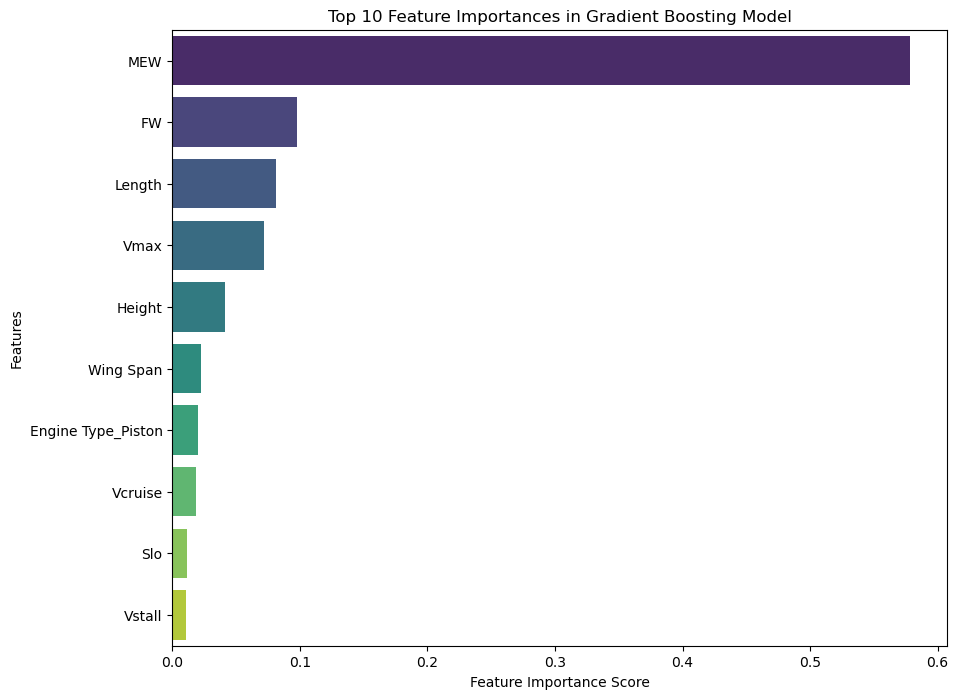

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have 'all_feature_names' from your previous ColumnTransformer and GradientBoostingRegressor as 'gb_regressor'

# Extract feature importances
feature_importances_gb = gb_regressor.feature_importances_

# Ensure all_feature_names is correctly defined and matches the processed features
# If all_feature_names is not defined in your context, make sure to reconstruct it from your preprocessor steps

# Combine feature names and their importance scores into a sorted list of tuples
feature_importance_tuples = list(zip(all_feature_names, feature_importances_gb))
sorted_feature_importances_gb = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

# Extract the top 10 most important features and their importances
top_features_gb, top_importances_gb = zip(*sorted_feature_importances_gb[:10])

# Convert the feature names and importances to lists for easier handling by seaborn
top_features_gb = list(top_features_gb)
top_importances_gb = list(top_importances_gb)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x=top_importances_gb, y=top_features_gb, palette='viridis')
plt.title('Top 10 Feature Importances in Gradient Boosting Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()


# Interpretation:

**High Importance Features**: The top features in this list are those that the Gradient Boosting Regressor found most predictive of the target variable. These features have the strongest relationships with the target variable, according to the model.

**Comparing Models**: You can compare these results with those from the RandomForestRegressor to see if both models identify similar features as important. Such comparisons can provide insights into the robustness of your feature set and whether certain features consistently influence the model's predictions.

**Model Decisions**: Understanding which features are deemed most important by the model can inform further data collection, feature engineering, and model tuning. It can also offer domain insights, helping to validate whether the model's behavior aligns with expert knowledge.

# Conclusions:
The RandomForestRegressor model demonstrates strong predictive performance with the provided dataset, making it a potentially useful tool for airline operators to simulate various fleet scenarios and assess the impact of different aircraft on their operations. Further model optimization could refine its predictions, and ongoing validation is essential to ensure its applicability to real-world scenarios.